# Master M2 MVA 2017/2018 - Graphical models - HWK 1

Sofiane Horache

NB: I apologize for the approximativ english but I think we can understand. Also, I often use the same letter for the random variable and the observation. I hope there is no ambiguity

## 1  Learning in discrete graphical models

Let $n \in \mathbb{N}$. $n$ is the number of sample.

Let $(x_i, z_i)$ , $i=1...n$ a iid sample of observations .
$\forall i, x_i \in \{1,..,K\}$ and $\forall i, z_i \in \{1,..,M\}$ where $K,M \in \mathbb{N}$.
We write $x=(x_i)_{i=1...n}$ and $z=(z_i)_{i=1...n}$
We have :

$$
p(z_i=m)=\pi_m
$$

and

$$
p(x_i=k|z_i=m)=\theta_{mk}
$$

Let's find the maximum log-likelihood estimator for $\pi$ and $\theta$. In other word,
let's find :
$$
(\hat{\pi}, \hat{\theta}) = \arg \max_{\pi,\theta}\log p_{\pi,\theta}(x,z)
$$
The sample is iid, so :
$$
\log p_{\pi,\theta}(x,z) = \sum_{i=1}^n\log p_{\pi,\theta}(x_i,z_i)
$$
We have :
$$
p_{\pi,\theta}(x_i,z_i) = p_{\pi,\theta}(x_i|z_i)p_{\pi,\theta}(z_i)
$$
But 
$$
 p_{\pi,\theta}(x_i=k|z_i=m)p_{\pi,\theta}(z_i=m) = \theta_{mk}\pi_{m}
$$
We note $$U_{m,k}^{(i)} = \mathbb{1}_{x_i=k, z_i=m}$$ We use one hot encoding.
So 
$$
p(U_{m,k}^{(i)}=1)= p_{\pi,\theta}(x_i=k|z_i=m)p_{\pi,\theta}(z_i=m) = \theta_{mk}\pi_{m}
$$
and 
$$
p(U^{(i)}=u^{(i)})=\prod_{k,m}(\theta_{mk}\pi_{m})^{u_{m,k}^{(i)}}
$$
If we use the one-hot encoding for $u^{i}$ we infer that :
$$
p_{\pi,\theta}(x_i,z_i)=p_{\pi,\theta}(u^{(i)})=\prod_{k,m}(\theta_{mk}\pi_{m})^{u_{m,k}^{(i)}}
$$
So
\begin{align}
\log p_{\pi,\theta}(x,z) &= \sum_{i=1}^n \sum_{k,m} u_{m,k}^{(i)}(\log (\theta_{mk})+ \log (\pi_m))\\
                         &= \sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m))
\end{align}

Where :
$$
\alpha_{m,k} = \sum_{i=1}^n u_{m,k}^{(i)}
$$
So we want to compute
$$
\arg \max_{\theta, \pi} \sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m))
$$
wrt
\begin{align}
\sum_{k,m}\theta_{mk} &= 1\\
 \sum_{m}\pi_m &= 1
\end{align}

We can notice that this is a concave otimization problem with constraint(the sum of concave function is concave) the function is coercive so this function has only one global maximum .
We'll use the lagrangian to solve this problem.
We pose:
$$
L(\theta, \pi, \mu, \nu) =\sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m)) + \mu (1-\sum_{k,m}\theta_{mk}) + \nu (1-\sum_{m}\pi_m)
$$
$L$ is differentiable and
$$
\frac{\partial L}{\partial \theta_{mk}}(\theta, \pi, \mu, \nu) = \frac{\alpha_{m,k}}{\theta_{mk}} - \mu
$$
and
$$
\frac{\partial L}{\partial \pi_{m}}(\theta, \pi, \mu, \nu) = \frac{\sum_k\alpha_{m,k}}{\pi_{m}} - \nu
$$
We have 
$$
(\hat{\pi}, \hat{\theta}) = \arg \max_{\pi,\theta}\log p_{\pi,\theta}(x,z)
$$
if and only if
$$
\nabla L((\hat{\pi}, \hat{\theta}),\mu,\nu)=0
$$
so
$$
\hat{\theta_{mk}}= \frac{\alpha_{m,k}}{\mu}
$$
and
$$
\hat{\pi_m} = \frac{\sum_k\alpha_{m,k}}{\nu}
$$
but $\mu$ an $\nu$ must satisfy the constraint ie:
\begin{align}
\sum_{k,m}\hat{\theta_{mk}} &= \sum_{k,m} =\frac{\alpha_{m,k}}{\mu}= 1\\
 \sum_{m}\hat{\pi_m} &= \sum_m \frac{\sum_k\alpha_{m,k}}{\nu} = 1
\end{align} 
Therefore
$$
\mu=\nu=\sum_{k,m} \alpha_{m,k} = n
$$
We conclude that the maximum likelihood is
\begin{align}
\hat{\theta_{mk}}&=\frac{\alpha_{m,k}}{n}\\
\hat{\pi_m}&=\frac{\sum_{k}\alpha_{m,k}}{n}
\end{align}
We remind that $\alpha_{m,k}$ is how many couple $(x_i, z_i)$ is equal to $(k,m)$
## 2 Linear classification




In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline 

/usr/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Data for training
dataA = pd.read_csv('./classification_data_HWK1/classificationA.train', sep='\t', header=None).as_matrix()
dataB = pd.read_csv('./classification_data_HWK1/classificationB.train', sep='\t', header=None).as_matrix()
dataC = pd.read_csv('./classification_data_HWK1/classificationC.train', sep='\t', header=None).as_matrix()
# Data for the test
testA = pd.read_csv('./classification_data_HWK1/classificationA.test',sep='\t', header=None).as_matrix()
testB = pd.read_csv('./classification_data_HWK1/classificationB.test',sep='\t', header=None).as_matrix()
testC = pd.read_csv('./classification_data_HWK1/classificationC.test',sep='\t', header=None).as_matrix()


In [3]:
def separ(data):
    """this function separates the data above in a matrix X and a vector y"""
    return data[:,:-1], data[:,-1]



### Generative model LDA

#### a) MLE of LDA

#### b) conditional distribution $p(y=1|x)$

#### c) implementation

In [4]:
#function of conditionnal distribution
def cond_distrib(x,w, b, pi):
    
    return 1.0/(1.0+(1-pi)/pi*np.exp(-(w.dot(x)+b)))

In [10]:
# computation of estimated parameters
def MLE_LDA(data):
    """This function computes the best estimator for the LDA. The input is the matrix [X,y] it returns mu0, mu1, pi and sigma. T"""
    X_train, y_train = separ(data)
    
    #estimated parameters
    n = y_train.shape[0]
    mu1 = np.sum(X_train[y_train==1],axis=0)/n
    mu0 = np.sum(X_train[y_train==0],axis=0)/n
    mu = np.sum(X_train,axis=0)/n
    pi = float(np.count_nonzero(y_train))/n
    
    sigma = np.zeros((2,2))
    Xc = X_train[y_train==0] - mu0
    for x in Xc:
        x= np.array([x]).T
        sigma += x.dot(x.T)
    sigma /= X_train[y_train==0].shape[0]
    
    Xc = X_train[y_train==1] - mu1
    for x in Xc:
        x= np.array([x]).T
        sigma += x.dot(x.T)
    sigma /= X_train[y_train==1].shape[0]
    #sigma = np.linalg.inv(sigma)
    #w = sigma.dot(mu1 -mu0)
    #b = mu0.dot(sigma.dot(mu0))-mu1.dot(sigma.dot(mu1))
    return mu0, mu1, sigma, pi
mu0, mu1, sigma, pi = MLE_LDA(dataA)
print(mu0)
print(mu1)
print(sigma)

[ 1.93313964 -0.595916  ]
[-0.89744001  0.28868067]
[[ 5.99091424 -2.36385546]
 [-2.36385546  1.03633325]]


In [24]:
def fit_LDA(data):
    """learn the parameter w and b and pi thanks to the MLE of LDA"""
    mu0, mu1, sigma, pi = MLE_LDA(data)
    siginv = np.linalg.inv(sigma)
    w = siginv.dot(mu1-mu0)
    b = 0.5*(mu0.dot(siginv.dot(mu0))-mu1.dot(siginv.dot(mu1)))
    return w,b, pi

def sep_LDA(w,b,pi,x):
    return 1.0/w[1] * (np.log((1-pi)/pi)-b-w[0]*x)

[-1.35696607 -2.24162931]
[-0.78848591 -0.93688739]
[-0.76815326 -0.19866138]


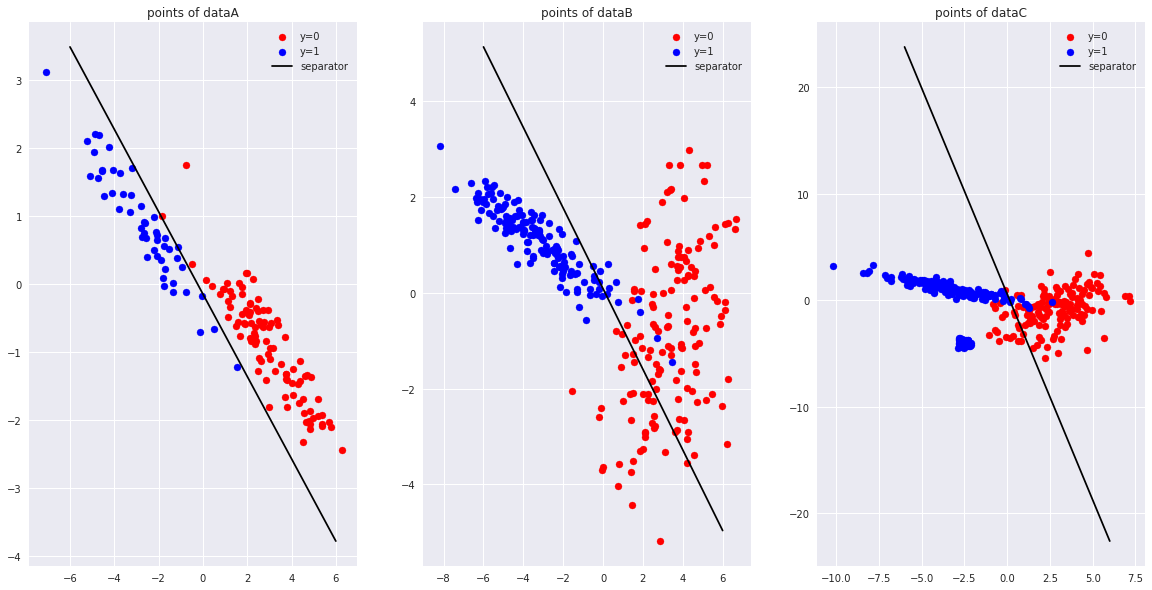

In [86]:
def plot_data_LDA(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    w,b,pi = fit_LDA(data)
    print(w)
    xline = np.linspace(-6.0,6.0,5)
    yline = sep_LDA(w,b,pi,xline)
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    l, = plt.plot(xline,yline, c='black', label='separator')
    plt.title(title)
    plt.legend(handles=[p1,p2,l])
plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_LDA(dataA,"points of dataA")
plt.subplot('132')
plot_data_LDA(dataB,"points of dataB")
plt.subplot('133')
plot_data_LDA(dataC,"points of dataC")

We conclude that for the data. The LDA classifier is really effective. Indeed, the training error is approximatly zero. Nevertheless, for the dataB and dataC, the LDA classifier gives poor results.

### 2 Logistic regression
Let $(x_i,y_i)_{i=1...n}$ be our sample of observations.$y_i\in\{0,1\}$, $x_i\in\mathbb{R}^2$. We call $\sigma$ the sigmoid function.
We aim at maximizing :
$$
f(\tilde{w}) =\sum_{i=1}^n y_i\tilde{w}^T\tilde{x}_i + \log (\sigma(-\tilde{w}^T\tilde{x}_i)) 
$$
where
$$
\forall i, \tilde{w}^T\tilde{x}_i = w^Tx_i+b
$$
We just have to add a column of one to the matrix X_train. To simplify the redaction we will not write the $\tilde{}$ anymore. 

so
$$
\nabla f(w) = \sum_{i=1}^n (y_i-\sigma(w^Tx_i))x_i
$$
The hessian is
$$
 Hf(w)=\sum_{i=1}^n -\sigma(w^Tx_i)(1-\sigma(w^Tx_i))x_ix_i^T
$$
So, f is concave. f is also coercive so f has a maximum and the maximum of f is unique

In [263]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))



def objective(data,w):
    """this function computes the objective function to maximize, its gradient and its hessian according to the
    data"""
    X_train, y_train = separ(data)
    one = np.array([np.ones(X_train.shape[0])]).T
    X=np.hstack((X_train,one))
    
    
    f = sum([y_train[i]*w.dot(X[i])+np.log(sigmoid(-w.dot(X[i]))) for i in range(X_train.shape[0])])
    eta = sigmoid(X.dot(w))
    
    grad = X.T.dot(y_train-eta)
    Deta = np.diag(eta*(1-eta))
    H=-X.T.dot(Deta.dot(X))
    
    
    return f, grad, H

def fit_logit(data, L):
    """this function compute the optimal parameter for the logistic regression, epsilon is a stop criterion"""
    shap = data.shape[1]
    w = np.zeros(shap) #initialisation
    f,grad,H = objective(data,w)
    Hinv = np.linalg.pinv(H)
    wp = (w-Hinv.dot(delta))
    
    
    for i in range(L):
        w = wp
        f,grad,H = objective(data,w)
        Hinv = np.linalg.pinv(H)
        wp = (w-Hinv.dot(delta))
    return w
def sep_logit(w,x):
    return 1.0/w[1]*(-w[0]*x-w[2])
def plot_data_logit(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    w= fit_logit(data,30)
    
    xline = np.linspace(-6.0,6.0,5)
    yline = sep_logit(w,xline)
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    l, = plt.plot(xline,yline, c='black', label='separator')
    plt.title(title)
    plt.legend(handles=[p1,p2,l])

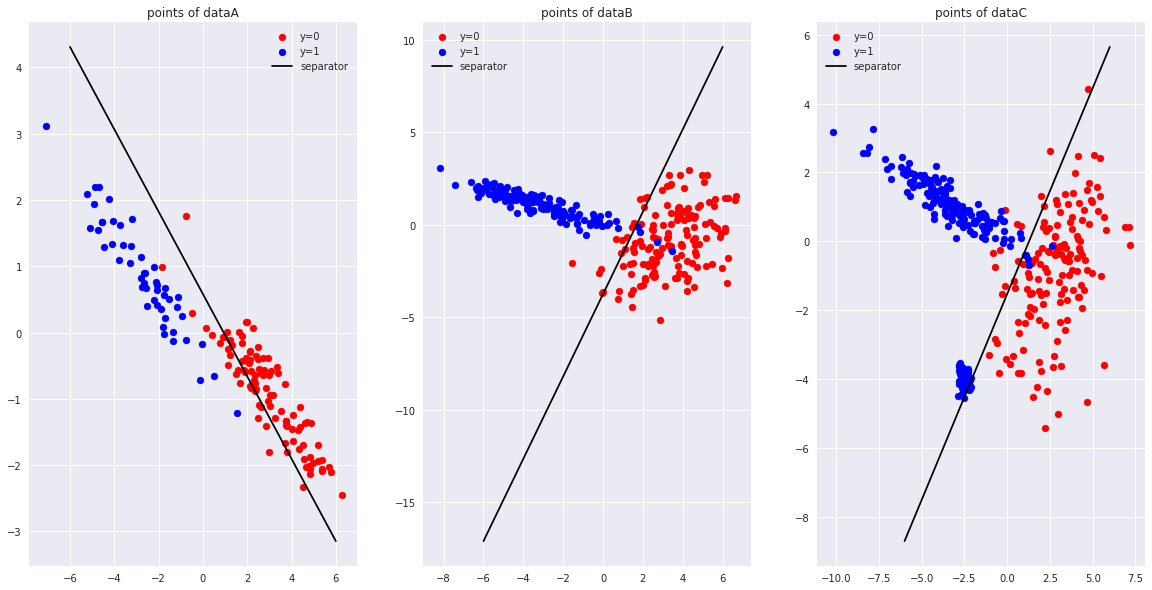

In [264]:
plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_logit(dataA,"points of dataA")
plt.subplot('132')
plot_data_logit(dataB,"points of dataB")
plt.subplot('133')
plot_data_logit(dataC,"points of dataC")


Conclusion : The logistic regression performs quite well but less precise for the dataA than the LDA. However, logistic regression is more robust.

###